### file import & dataset

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

In [4]:
import warnings # 경고 제거
warnings.filterwarnings('ignore')

In [5]:
test_img_dir = "../data/test"
submission_df = pd.read_csv("../data/sample_submission.csv")

### data 확인

1. 파일 존재 및 일치 여부 확인

In [8]:
img_files = set(os.listdir(test_img_dir))
csv_files = set(submission_df['ID'])

missing_in_dir = csv_files - img_files
extra_in_dir = img_files - csv_files

print("CSV에 있지만 디렉토리에 없는 파일:", len(missing_in_dir))
print("디렉토리에 있지만 CSV에 없는 파일:", len(extra_in_dir))

CSV에 있지만 디렉토리에 없는 파일: 0
디렉토리에 있지만 CSV에 없는 파일: 0


2. 해상도 및 aspect ratio 분석


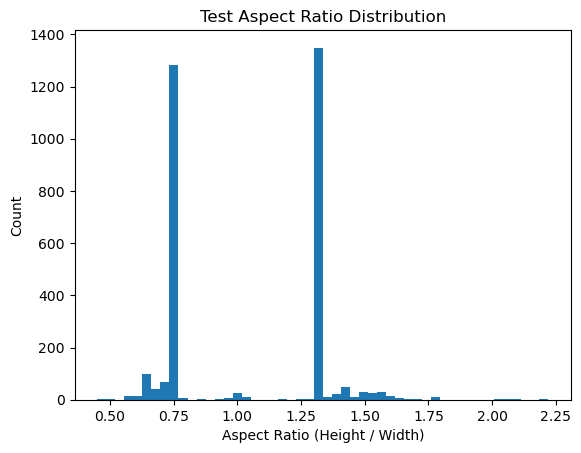

In [10]:
aspect_ratios = []

for img_name in submission_df['ID']:
    img_path = os.path.join(test_img_dir, img_name)
    img = cv2.imread(img_path)
    h, w = img.shape[:2]
    aspect_ratios.append(round(h / w, 2))

plt.hist(aspect_ratios, bins=50)
plt.title("Test Aspect Ratio Distribution")
plt.xlabel("Aspect Ratio (Height / Width)")
plt.ylabel("Count")
plt.show()

3. 밝기 및 대비

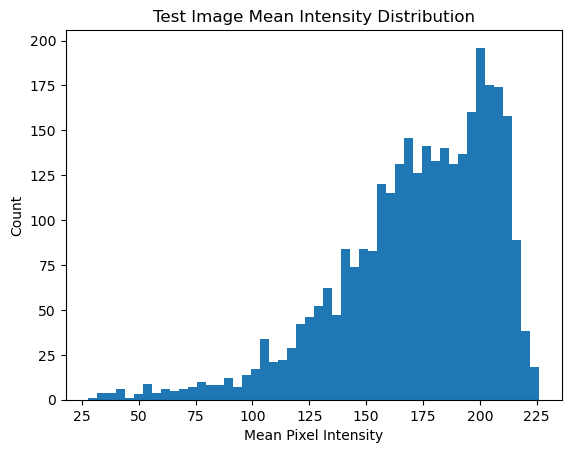

In [11]:
mean_intensities = []

for img_name in submission_df['ID']:
    img_path = os.path.join(test_img_dir, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    mean_intensities.append(np.mean(img))

plt.hist(mean_intensities, bins=50)
plt.title("Test Image Mean Intensity Distribution")
plt.xlabel("Mean Pixel Intensity")
plt.ylabel("Count")
plt.show()

5. 마스킹 여부 분석 (밝은/어두운 영역 비율)

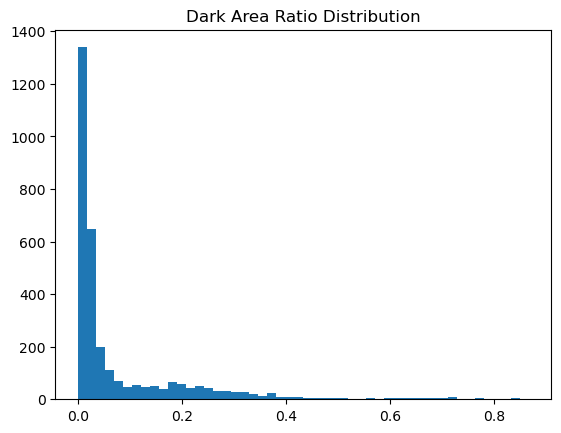

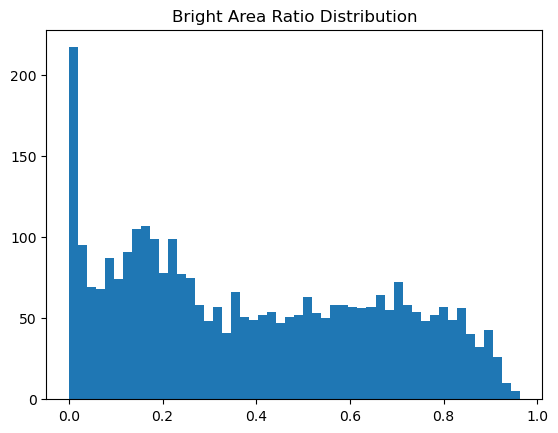

In [12]:
dark_ratios = []
bright_ratios = []

for img_name in submission_df['ID']:
    img_path = os.path.join(test_img_dir, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    dark_ratio = np.sum(img < 50) / img.size
    bright_ratio = np.sum(img > 200) / img.size
    dark_ratios.append(dark_ratio)
    bright_ratios.append(bright_ratio)

plt.hist(dark_ratios, bins=50)
plt.title("Dark Area Ratio Distribution")
plt.show()

plt.hist(bright_ratios, bins=50)
plt.title("Bright Area Ratio Distribution")
plt.show()

6. 흑백 / 컬러 비율

In [13]:
bw_count = 0
color_count = 0

for img_name in submission_df['ID']:
    img_path = os.path.join(test_img_dir, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)

    if img is None:
        continue

    b, g, r = cv2.split(img)

    if (b == g).all() and (b == r).all():
        bw_count += 1
    else:
        color_count += 1

total = bw_count + color_count

print(f"총 이미지 수: {total}")
print(f"흑백 이미지 수: {bw_count} ({bw_count / total * 100:.2f}%)")
print(f"컬러 이미지 수: {color_count} ({color_count / total * 100:.2f}%)")

총 이미지 수: 3140
흑백 이미지 수: 0 (0.00%)
컬러 이미지 수: 3140 (100.00%)
